In [1]:
# ---------------------------------------------
# 1. Setup: Mount Google Drive and Navigate
# ---------------------------------------------
from google.colab import drive
drive.mount('/content/drive')

# Navigate to the repo folder
%cd /content/drive/MyDrive/Spring2025/"summer 25"/pytorch_intro_s25/images


Mounted at /content/drive
/content/drive/MyDrive/Spring2025/summer 25/pytorch_intro_s25/images


In [8]:
cd /content/drive/MyDrive/Spring2025/summer 25/pytorch_intro_s25/images


/content/drive/MyDrive/Spring2025/summer 25/pytorch_intro_s25/images


In [2]:
ls

Image_100.jpg  Image_10.jpg  Image_12.jpg  Image_14.jpg  Image_16.jpg
Image_101.jpg  Image_11.jpg  Image_13.jpg  Image_15.jpg  Image_1.jpg


In [9]:
import os
os.listdir()

['Image_1.jpg',
 'Image_10.jpg',
 'Image_100.jpg',
 'Image_101.jpg',
 'Image_11.jpg',
 'Image_12.jpg',
 'Image_13.jpg',
 'Image_14.jpg',
 'Image_15.jpg',
 'Image_16.jpg']

In [10]:
# ---------------------------------------------
# 2. List Image Files in the Folder
# ---------------------------------------------
import os #operative system library

image_files = [f for f in os.listdir() if f.endswith(('.png', '.jpg', '.jpeg'))]


In [15]:
image_files[-1] ## -1 the last element in the list, 0 the first element in the list, 0:3 range of elements

'Image_16.jpg'

In [16]:
len(image_files) ## Count the number of elements in a list
## Charactrristics of list : Index the elements, Allow you duplications, allow you different types of elements, Because you can idex, you can also now the number of elements in the list.
## Set: dont allow duplications, is not indexable

10

In [19]:
print(f"Found {len(image_files)} image files:") ## f "Text {variable}" f--> fortmat
#print("Found "+str(len(image_files))+"imnages")
print(image_files)

Found 10 image files:
Found 10imnages
['Image_1.jpg', 'Image_10.jpg', 'Image_100.jpg', 'Image_101.jpg', 'Image_11.jpg', 'Image_12.jpg', 'Image_13.jpg', 'Image_14.jpg', 'Image_15.jpg', 'Image_16.jpg']


In [23]:
image_files[0]

'Image_1.jpg'

In [21]:
# ---------------------------------------------
# 3. Load and Visualize Images with PIL and matplotlib
# ---------------------------------------------
from PIL import Image ## PIL--> python image library
import matplotlib.pyplot as plt ##Alias for matplotlib.pyplot --> plt



In [24]:
pwd

'/content/drive/MyDrive/Spring2025/summer 25/pytorch_intro_s25/images'

In [29]:
# Load one image
img_path = image_files[5]
img = Image.open(img_path)

#img = Image.open("Image_1.jpg")


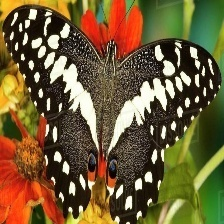

In [30]:
img

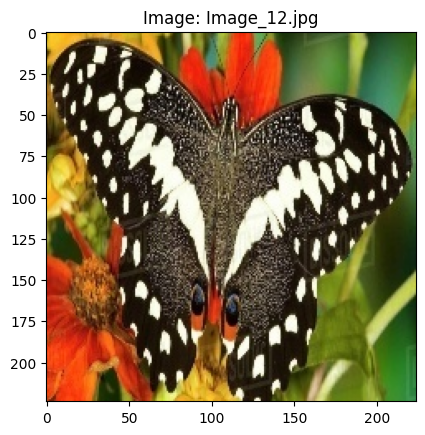

Size: (224, 224), Mode: RGB


In [41]:
# Show image
plt.imshow(img)
plt.title(f"Image: {img_path}")
plt.axis('on')
plt.show()

# Image details
print(f"Size: {img.size}, Mode: {img.mode}")

In [33]:
# ---------------------------------------------
# 4. Convert Image to Tensor using torchvision
# ---------------------------------------------
import torchvision.transforms as transforms ## Pytorch package for computer vision
import torch ##Pytorch library

# Transform: PIL to Tensor (automatically converts to [0, 1] float)
to_tensor = transforms.ToTensor() ##Function placeholder
img_tensor = to_tensor(img)

print(f"Tensor shape: {img_tensor.shape}")
print(f"Tensor min: {img_tensor.min()}, max: {img_tensor.max()}")


Tensor shape: torch.Size([3, 224, 224])
Tensor min: 0.0, max: 1.0


In [37]:
img_np = img_tensor.permute(1, 2, 0).numpy()  # [C, H, W] -> [H, W, C]
img_np

array([[[0.8117647 , 0.6666667 , 0.10588235],
        [0.8627451 , 0.69803923, 0.11764706],
        [0.93333334, 0.73333335, 0.12941177],
        ...,
        [0.19607843, 0.3647059 , 0.08235294],
        [0.20392157, 0.37254903, 0.09019608],
        [0.20392157, 0.3764706 , 0.08235294]],

       [[0.7882353 , 0.64705884, 0.09803922],
        [0.8784314 , 0.72156864, 0.14509805],
        [0.9607843 , 0.7607843 , 0.15686275],
        ...,
        [0.19607843, 0.3647059 , 0.08235294],
        [0.20392157, 0.37254903, 0.09019608],
        [0.20392157, 0.3764706 , 0.08235294]],

       [[0.7254902 , 0.6       , 0.07058824],
        [0.8666667 , 0.72156864, 0.16078432],
        [0.9607843 , 0.78039217, 0.16862746],
        ...,
        [0.19215687, 0.37254903, 0.08627451],
        [0.19607843, 0.3764706 , 0.09019608],
        [0.19607843, 0.3764706 , 0.08235294]],

       ...,

       [[0.8117647 , 0.27450982, 0.07058824],
        [0.78431374, 0.25882354, 0.05882353],
        [0.80784315, 0

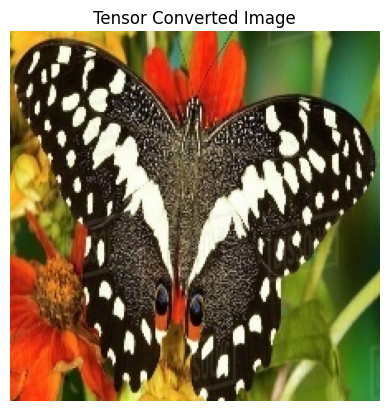

In [38]:
# ---------------------------------------------
# 5. Visualize Tensor Image
# ---------------------------------------------
# Convert tensor back to numpy for display
img_np = img_tensor.permute(1, 2, 0).numpy()  # [C, H, W] -> [H, W, C]

plt.imshow(img_np)
plt.title("Tensor Converted Image")
plt.axis('off')
plt.show()


In [40]:
# ---------------------------------------------
# 6. Normalize Image Tensor (Standardization)
# ---------------------------------------------
# Dummy example with mean and std = 0.5 per channel
normalize = transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                 std=[0.5, 0.5, 0.5])

img_normalized = normalize(img_tensor)

print(f"Normalized Tensor: min={img_normalized.min()}, max={img_normalized.max()}")


Normalized Tensor: min=-1.0, max=1.0


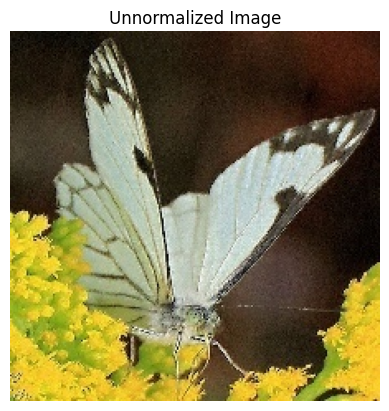

In [ ]:
# ---------------------------------------------
# 7. Convert Back to Visualizable Image
# (De-normalization just for display)
# ---------------------------------------------
# Unnormalize
unnormalize = transforms.Normalize(mean=[-1, -1, -1],
                                   std=[2, 2, 2])
img_unnorm = unnormalize(img_normalized)

# Convert to numpy and plot
plt.imshow(img_unnorm.permute(1, 2, 0).clamp(0, 1).numpy())
plt.title("Unnormalized Image")
plt.axis('off')
plt.show()


Dataset size: 10


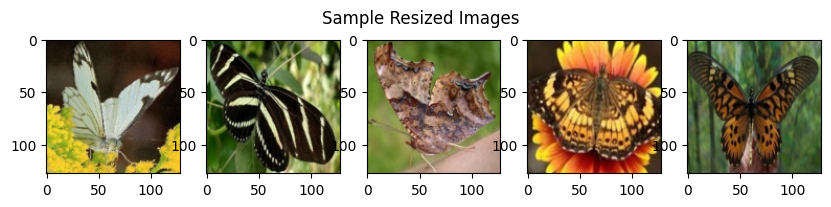

In [46]:
# ---------------------------------------------
# 8. Batch Load Images using torchvision.datasets (Optional)
# ---------------------------------------------
from torch.utils.data import Dataset
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.img_list = [os.path.join(img_dir, f) for f in os.listdir(img_dir)
                         if f.endswith(('.png', '.jpg', '.jpeg'))]
        self.transform = transform

    def __len__(self):
        return len(self.img_list)

    def __getitem__(self, idx):
        img_path = self.img_list[idx]
        image = Image.open(img_path)
        if self.transform:
            image = self.transform(image)
        return image

transform_pipeline = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

dataset = CustomImageDataset('./', transform=transform_pipeline)
print(f"Dataset size: {len(dataset)}")

# Plot a few
plt.figure(figsize=(10, 2))
for i in range(5):
    img = dataset[i].permute(1, 2, 0)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('on')
plt.suptitle("Sample Resized Images")
plt.show()
